<a href="https://colab.research.google.com/github/jiin124/Kaggle/blob/main/Suicide_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [4]:
!kaggle datasets download -d nikhileswarkomati/suicide-watch

suicide-watch.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip '*.zip'

Archive:  suicide-watch.zip
replace Suicide_Detection.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Suicide_Detection.csv   


In [6]:
df=pd.read_csv('Suicide_Detection.csv')
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


## 각 문장의 길이

In [8]:
df['length']=df['text'].apply(lambda x:len(x.split(' ')))
df.head()

,text,class,length
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,143
1,Am I weird I don't get affected by compliments...,non-suicide,27
2,Finally 2020 is almost over... So I can never ...,non-suicide,26
3,i need helpjust help me im crying so hard,suicide,9
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,436


In [12]:
df['length'].describe()

count    232074.000000
mean        131.546438
std         222.081581
min           1.000000
25%          26.000000
50%          60.000000
75%         154.000000
max       15632.000000
Name: length, dtype: float64

In [52]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(df['length'].quantile(i))

15.0
22.0
30.0
42.0
60.0
86.0
126.0
190.0
317.0


In [53]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(df['length'].quantile(i))

339.0
363.0
393.0
427.0
470.0
526.0
604.0
721.0
960.0


길이 317 이하는 삭제하려고 한다. 

In [9]:
df=df[df.length<=317]

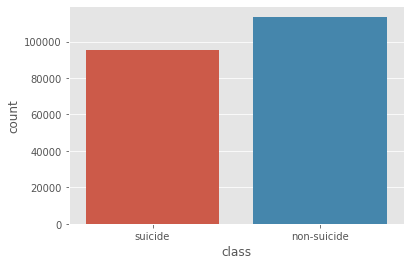

In [80]:
sns.countplot(df['class'])

In [108]:
df['class'].value_counts()

non-suicide    113607
suicide         95348
Name: class, dtype: int64

In [82]:
len(df)

208955

In [10]:
words=list()
for i in df['text']:
  for j in i.split(' '):
    words.append(j.lower())
len(words)

16688702

In [11]:
from collections import Counter

In [12]:
words_freq = Counter(words)
words_freq = pd.DataFrame({'Word':list(words_freq.keys()),'Frequency':list(words_freq.values())})
words_freq.sort_values('Frequency',ascending=False,inplace=True)
words_freq.head(70)

,Word,Frequency
4,i,890827
18,to,558762
16,and,464789
90,the,350903
30,a,339305
...,...,...
404,can't,35968
296,had,35618
460,don’t,35336
1328,i've,35261


In [112]:
len(words_freq)

428485

In [87]:
words_freq['Frequency'].describe()

count    428485.000000
mean         38.948159
std        2287.936870
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      890827.000000
Name: Frequency, dtype: float64

In [88]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(words_freq['Frequency'].quantile(i))

228.0
270.0
325.6120000000228
406.0
528.0
709.0
1035.0
1825.0
4103.320000001229


99%이하로 자주 등장하지 않는 단어들은 삭제..

In [13]:
words_freq = words_freq[words_freq['Frequency']>words_freq['Frequency'].quantile(0.99)]
len(words_freq)

4281

In [90]:
words_freq['Frequency'].describe()

count      4281.000000
mean       3504.896987
std       22625.260889
min         195.000000
25%         294.000000
50%         528.000000
75%        1378.000000
max      890827.000000
Name: Frequency, dtype: float64

In [14]:
words_freq=words_freq[words_freq['Frequency']<31905]
words_freq.head(10)

,Word,Frequency
726,some,31882
145,me.,31630
3986,filler,31016
1254,we,30745
11,has,29485
125,fucking,29125
621,why,28574
210,being,28508
692,any,27763
385,more,27456


In [92]:
len(words_freq)

4202

In [93]:
words_freq.describe()

,Frequency
count,4202.000000
mean,1613.881485
std,3410.400603
min,195.000000
25%,292.000000
50%,519.000000
75%,1252.750000
max,31882.000000


In [94]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(words_freq['Frequency'].quantile(i))

19803.076999999972
20529.751999999964
21670.046999999926
22609.074000000095
24278.224999999984
25391.77599999999
26753.605999999985
27639.58599999999
29412.64000000032


In [15]:
words_freq = words_freq[words_freq['Frequency'] >= 3615.8130000000237]
words_freq.head()

,Word,Frequency
726,some,31882
145,me.,31630
3986,filler,31016
1254,we,30745
11,has,29485


In [96]:
words_freq.tail()

,Word,Frequency
71,supposed,3718
117,hear,3711
2096,friends.,3684
3339,mother,3668
2387,loved,3617


In [116]:
len(words_freq)

380

In [18]:
final_words=list(words_freq.Word)
final_words[:20]

['some',
 'me.',
 'filler',
 'we',
 'has',
 'fucking',
 'why',
 'being',
 'any',
 'more',
 'much',
 'im',
 'it.',
 'make',
 'need',
 'there',
 'help',
 'your',
 'someone',
 'got']

In [118]:
df.head()

,text,class,length
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,143
1,Am I weird I don't get affected by compliments...,non-suicide,27
2,Finally 2020 is almost over... So I can never ...,non-suicide,26
3,i need helpjust help me im crying so hard,suicide,9
5,Honetly idkI dont know what im even doing here...,suicide,289


In [119]:
df['class'].value_counts()

non-suicide    113607
suicide         95348
Name: class, dtype: int64

In [16]:
class_data=df['class']
class_data

0             suicide
1         non-suicide
2         non-suicide
3             suicide
5             suicide
             ...     
232068    non-suicide
232069    non-suicide
232070    non-suicide
232071    non-suicide
232073    non-suicide
Name: class, Length: 208955, dtype: object

In [19]:
for i in final_words:
    df[i] = df['text'].apply(lambda x: 1 if i in x.lower().split(' ') else 0)

In [21]:
df.drop('text',axis=1,inplace=True)
df.head()

,class,length,some,me.,filler,we,has,fucking,why,being,...,weird,what's,longer,others,thank,supposed,hear,friends.,mother,loved
0,suicide,143,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,non-suicide,27,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,non-suicide,26,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,suicide,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,suicide,289,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['class']=class_data
df.head()

In [22]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)
df.head()

,class,length,some,me.,filler,we,has,fucking,why,being,...,weird,what's,longer,others,thank,supposed,hear,friends.,mother,loved
0,1,143,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,27,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,26,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,289,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.shape

(208955, 381)

# EDA

0 : non suicide
1 : suicide

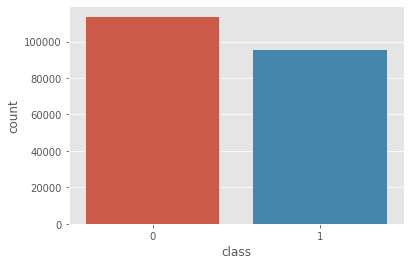

In [127]:
sns.countplot(data=df,x='class')

In [128]:
df['class'].value_counts().to_frame()

,class
0,113607
1,95348


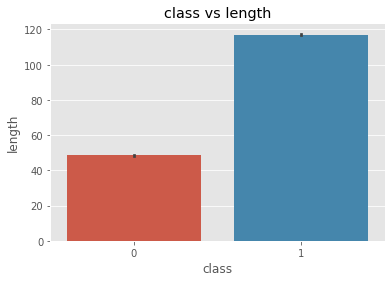

In [131]:
#class and length
sns.barplot(x='class',y='length',data=df)
plt.title('class vs length')
plt.show()

In [133]:
from scipy.stats import pearsonr

In [137]:
Correlations=dict()
var=list(df.columns)#데이터의 컬럼명저장
var.remove('class')

print(var)

for i in var:
  Correlations[i]=pearsonr(df[i],df['class'])[0]

Correlations=pd.DataFrame({'Feature':list(Correlations.keys()),'Correlation':list(Correlations.values())})

Correlations.sort_values('Correlation',ascending=False,inplace=True)
Correlations.set_index('Feature')
Correlations.head(10)

['length', 'some', 'me.', 'filler', 'we', 'has', 'fucking', 'why', 'being', 'any', 'more', 'much', 'im', 'it.', 'make', 'need', 'there', 'help', 'your', 'someone', 'got', 'them', 'then', 'kill', 'good', 'by', 'friends', 'see', 'day', 'anyone', 'could', 'too', 'still', 'talk', 'hate', 'it’s', 'things', 'end', 'every', 'something', 'always', 'years', 'way', 'other', 'should', 'than', 'nothing', 'live', 'here', 'over', 'anything', 'love', 'last', 'say', 'take', 'everything', 'back', 'ever', 'right', 'dont', 'after', 'everyone', 'school', 'suicide', 'i’ve', 'into', 'where', 'can’t', 'tell', 'keep', 'getting', 'family', 'him', 'anymore.', 'off', 'thing', 'shit', 'fuck', 'very', 'doing', 'since', 'better', 'through', 'me,', 'die', 'bad', 'thought', 'year', 'their', 'feeling', 'made', 'find', 'tried', 'friend', 'its', 'try', 'wish', 'care', 'did', 'told', 'few', 'said', 'parents', 'give', 'trying', 'also', 'wanna', '\n\ni', "i'll", 'were', 'before', 'gonna', 'life.', 'around', 'please', 'pers

,Feature,Correlation
0,length,0.458362
23,kill,0.309071
2,me.,0.279329
63,suicide,0.271519
37,end,0.257212
73,anymore.,0.247672
47,live,0.228209
119,myself.,0.222832
13,it.,0.222543
132,suicidal,0.219771


In [166]:
temp = Correlations.head(15)
temp

,Feature,Correlation
0,length,0.458362
23,kill,0.309071
2,me.,0.279329
63,suicide,0.271519
37,end,0.257212
73,anymore.,0.247672
47,live,0.228209
119,myself.,0.222832
13,it.,0.222543
132,suicidal,0.219771


In [147]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [167]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=temp.Feature,
    y=temp.Correlation,
    name='Feature vs Correlation'
))

In [150]:
Correlations.tail(15)

,Feature,Correlation
184,ㅤ,-0.028709
106,wanna,-0.029934
370,weird,-0.031056
246,idk,-0.032433
4,we,-0.032647
230,us,-0.032701
151,girl,-0.047838
281,reddit,-0.048870
270,kinda,-0.054916
286,play,-0.059581


In [154]:
temp = Correlations.tail(15)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=temp.Correlation,
    x=temp.Feature,
    name='Feature vs Correlation'
))

In [24]:
df_pred = df.drop('length',axis=1)

In [25]:
df_pred.head()

,class,some,me.,filler,we,has,fucking,why,being,any,...,weird,what's,longer,others,thank,supposed,hear,friends.,mother,loved
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df_pred.drop('class',axis=1)
y=df_pred['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(167164, 379)
(41791, 379)
(167164,)
(41791,)


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [31]:
xgb=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
pred_proba=xgb.predict_proba(X_test)[:,1]

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(y_test,pred))

0.8715512909478117
